# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [30]:
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
import datetime
import os

# conda install -c conda-forge yfinance
import yfinance as yfin
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

------------

In [6]:
import datetime
# start = datetime.date(2006, 1, 1) (use datetime to set START and END)
start = "2006-01-01"
end = "2016-01-01"

In [7]:
#Tickers for Each Bank: Bank of America - BAC , CitiGroup - C, Goldman Sachs - GS , JPMorgan Chase - JPM, Morgan Stanley MS, Wells Fargo - WFC
yfin.pdr_override()
# Bank of America
BAC = wb.get_data_yahoo("BAC", start, end)
# CitiGroup 
C = wb.DataReader('C', start, end)
# Goldman Sachs 
GS = wb.DataReader('GS', start, end)
# JPMorgan Chase
JPM = wb.DataReader('JPM', start, end)
# Morgan Stanley
MS = wb.DataReader('MS', start, end)
# Wells Fargo
WFC = wb.DataReader('WFC', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
C.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,490.000000,493.799988,481.100006,492.899994,342.796936,1537600
2006-01-04,488.600006,491.000000,483.500000,483.799988,336.468170,1870960
2006-01-05,484.399994,487.799988,484.000000,486.200012,338.137360,1143160
2006-01-06,488.799988,489.000000,482.000000,486.200012,338.137360,1370210
2006-01-09,486.000000,487.399994,483.000000,483.899994,336.537659,1680740


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', ' WFC']
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', ' WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [10]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis = 1, keys=tickers) # axis 1 cause concat with columns.
bank_stocks
# help(pd.concat)

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2006-01-03  46.919998  47.180000  46.150002  47.080002  32.425449  16296700   
2006-01-04  47.000000  47.240002  46.450001  46.580002  32.081108  17757900   
2006-01-05  46.580002  46.830002  46.320000  46.639999  32.122417  14970700   
2006-01-06  46.799999  46.910000  46.349998  46.570000  32.074188  12599800   
2006-01-09  46.720001  46.970001  46.360001  46.599998  32.094852  15619400   
...               ...        ...        ...        ...        ...       ...   
2015-12-24  17.320000  17.379999  17.219999  17.270000  14.669742  29369400   
2015-12-28  17.219999  17.230000  16.980000  17.129999  14.550818  41777500   
2015-12-29  17.250000  17.350000  17.160000  17.280001  14.678233  45670400   
2015-12-30  17.200001  17.240000  17.040001  17.049999  14.482862  35066400   
2015-12-31  17.010000  17.070000  16.830000  16.830000  14.295992  47153000   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2006-01-03  490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04  488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05  484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06  488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09  486.000000  487.399994  483.000000  483.899994  ...  58.619999   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.480000   52.970001   52.450001   52.709999  ...  32.439999   
2015-12-28   52.570000   52.570000   51.959999   52.380001  ...  31.950001   
2015-12-29   52.759998   53.220001   52.740002   52.980000  ...  32.330002   
2015-12-30   52.840000   52.939999   52.250000   52.299999  ...  32.200001   
2015-12-31   52.070000   52.389999   51.750000   51.750000  ...  31.770000   

                                                 WFC                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2006-01-03  58.310001  33.995926  5377000  31.600000  31.975000  31.195000   
2006-01-04  58.349998  34.019226  7977800  31.799999  31.820000  31.365000   
2006-01-05  58.509998  34.112518  5778000  31.500000  31.555000  31.309999   
2006-01-06  58.570000  34.147503  6889800  31.580000  31.775000  31.385000   
2006-01-09  59.189999  34.508965  4144500  31.674999  31.825001  31.555000   
...               ...        ...      ...        ...        ...        ...   
2015-12-24  32.480000  26.389029  2798200  54.970001  55.090000  54.709999   
2015-12-28  32.169998  26.137152  5420300  54.549999  54.779999  54.169998   
2015-12-29  32.549999  26.445894  6388200  55.110001  55.349998  54.990002   
2015-12-30  32.230000  26.185905  5057200  55.270000  55.310001  54.790001   
2015-12-31  31.809999  25.844675  8154300  54.509998  54.950001  54.220001   

                                            
                Close  Adj Close    Volume  
Date                                        
2006-01-03  31.900000  19.542263  11016400  
2006-01-04  31.530001  19.315603  10870000  
2006-01-05  31.495001  19.294163  10158000  
2006-01-06  31.680000  19.407495   8403800  
2006-01-09  31.674999  19.404434   5619600  
...               ...        ...       ...  
2015-12-24  54.820000  43.737064   4999400  
2015-12-28  54.680000  43.625362   8288800  
2015-12-29  55.290001  44.112049   7894900  
2015-12-30  54.889999  43.792919   8016900  
2015-12-31  54.360001  43.370068  10929800  

[2517 rows x 36 columns]

** Set the column name levels:**

In [11]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** head of the bank_stocks dataframe.**

In [12]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.425449  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.081108  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.122417  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.074188  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.094852  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.995926  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.019226  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.112518  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.147503  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.508965  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.542263  11016400  
2006-01-04   31.530001  19.315603  10870000  
2006-01-05   31.495001  19.294163  10158000  
2006-01-06   31.680000  19.407495   8403800  
2006-01-09   31.674999  19.404434   5619600  

[5 rows x 36 columns]

In [13]:
bank_stocks.xs('BAC', level='Bank Ticker',  axis=1).pct_change()

Stock Info,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.001705,0.001272,0.006501,-0.010620,-0.010619,0.089662
2006-01-05,-0.008936,-0.008679,-0.002799,0.001288,0.001288,-0.156955
2006-01-06,0.004723,0.001708,0.000648,-0.001501,-0.001501,-0.158369
2006-01-09,-0.001709,0.001279,0.000216,0.000644,0.000644,0.239655
...,...,...,...,...,...,...
2015-12-24,0.009324,0.002307,0.007017,-0.004037,-0.004037,-0.553458
2015-12-28,-0.005774,-0.008631,-0.013937,-0.008107,-0.008107,0.422484
2015-12-29,0.001742,0.006965,0.010601,0.008757,0.008757,0.093182


# EDA

Documentation: [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** What is the max Close price for each bank's stock throughout the time period?**

In [14]:
max = bank_stocks.xs(key='Close', level='Stock Info', axis = 1, drop_level = False).max()
#https://stackoverflow.com/questions/25189575/pandas-dataframe-select-columns-in-multiindex
max

Bank Ticker  Stock Info
BAC          Close          54.900002
C            Close         564.099976
GS           Close         247.919998
JPM          Close          70.080002
MS           Close          89.300003
 WFC         Close          58.520000
dtype: float64

In [15]:
# bank_stocks['BAC']['Close'].max()
# for tick in tickers:
#     print(bank_stocks[tick]['Close'])

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [16]:
returns = pd.DataFrame()

** We use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [17]:
# returns.drop(returns.index, inplace=True)
# returns.iloc[0:0]

In [18]:
#df.iloc[df.index.get_level_values(1)=='cc'] = df.xs('aa', level=1) + df.xs('bb', level=1) 
for tick in tickers: 
    returns[tick  + ' Returns'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

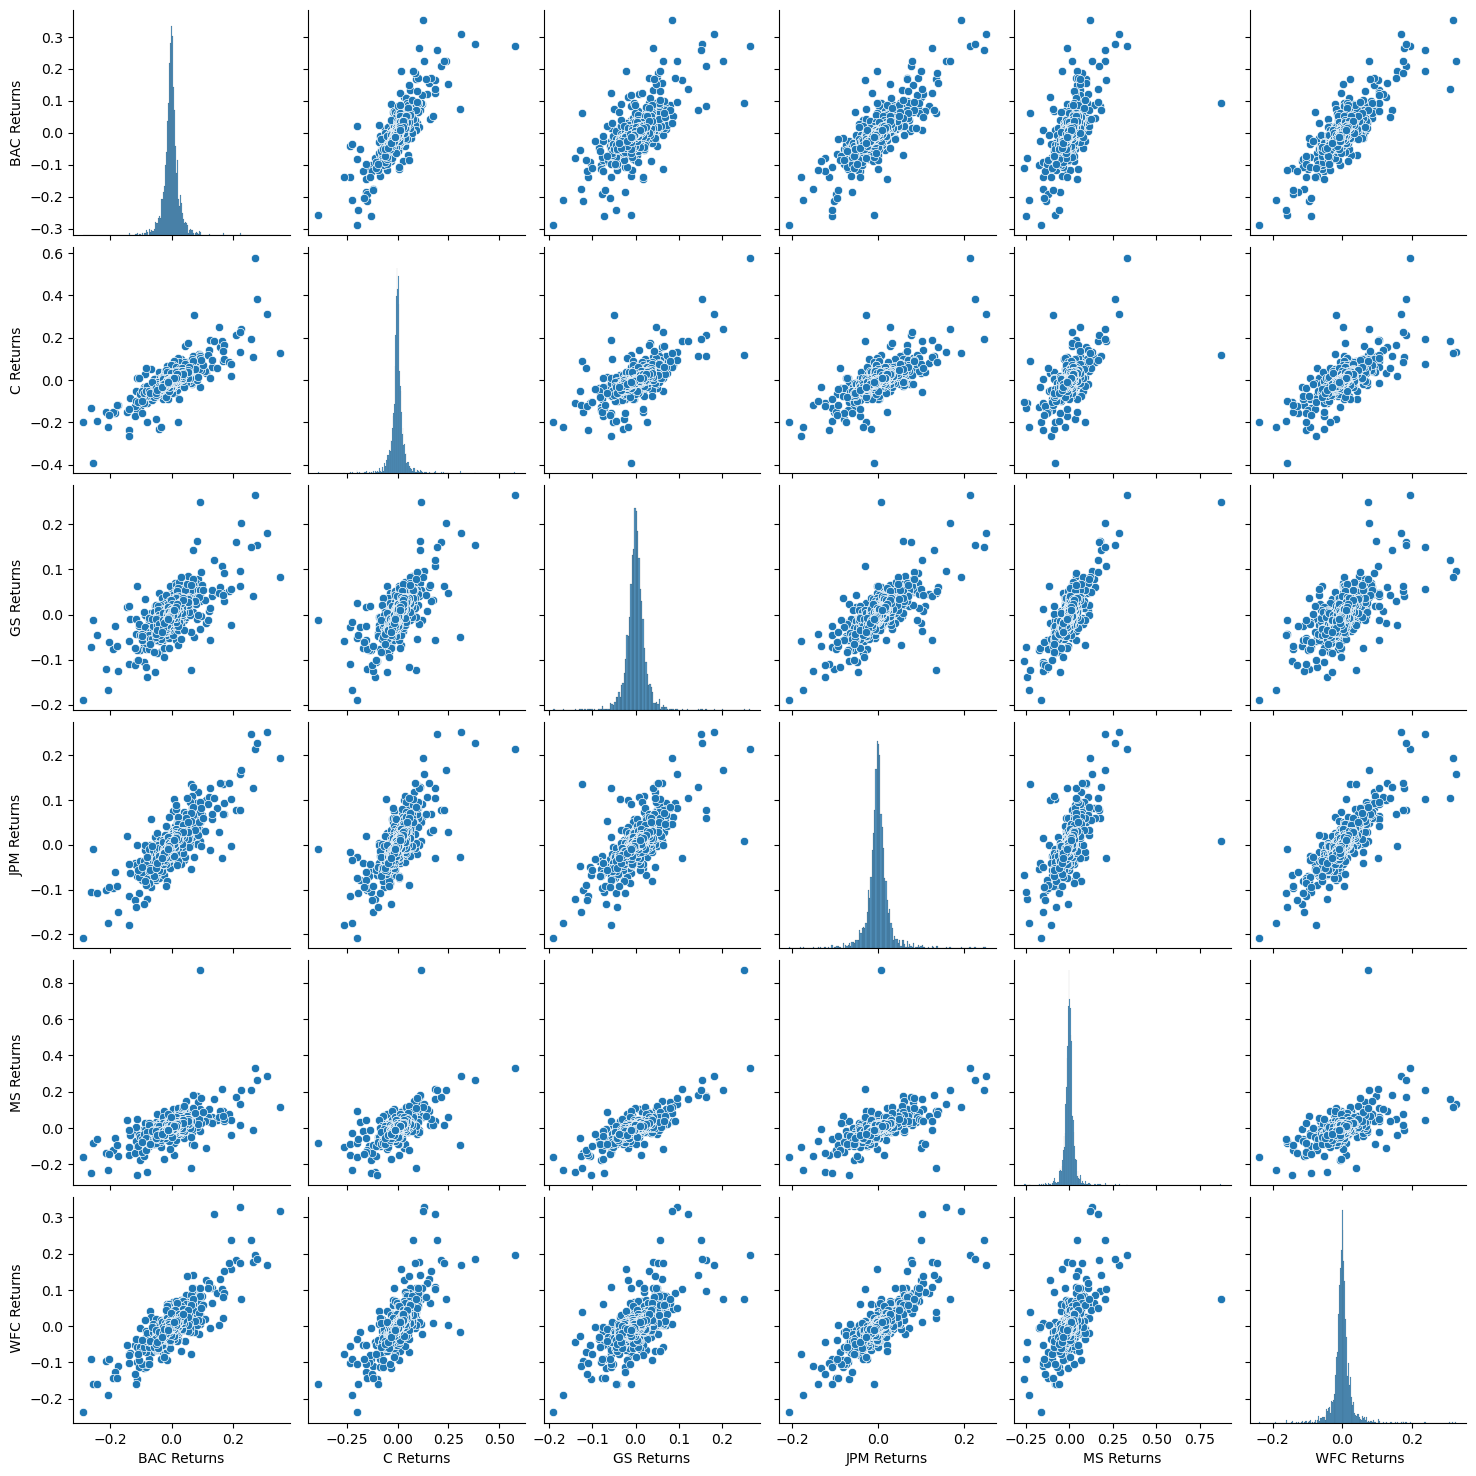

In [19]:
import seaborn as sns
import matplotlib as plt
%matplotlib inline
 
sns.pairplot(data = returns[1:])

# Morgan Stanley is the lowest, in growth # JPM & WFC, seem to be the highest 
# C & HS slightly simlar 
# Citicgroup, Straigt line, huge stock carash, nov 2008 Citigroup was insolvent, story behind data analysis

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [20]:
returns.idxmin()

# returns.min()
# 2009-01-20, Barack Obama inauguration.
# 4 banks returned same day of worst day drops

BAC Returns    2009-01-20
C Returns      2009-02-27
GS Returns     2009-01-20
JPM Returns    2009-01-20
MS Returns     2008-10-09
 WFC Returns   2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

In [43]:
returns.idxmax()
# Citgroup's largest drop and biggest gain were close together, because the bank had droppeed at it's peak
# Morgan lost 80% of its market, 42% slide in its share price in 2 days
# jp morgans next day is better 

BAC Returns    2009-04-09
C Returns      2008-11-24
GS Returns     2008-11-24
JPM Returns    2009-01-21
MS Returns     2008-10-13
 WFC Returns   2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [22]:
returns.std()

# large STD, going up and down alot, risky
# lower, is 

# Review Citi Group

BAC Returns     0.036647
C Returns       0.038672
GS Returns      0.025390
JPM Returns     0.027667
MS Returns      0.037819
 WFC Returns    0.030238
dtype: float64

In [23]:
# returns.reset_index()[returns.reset_index()['Date'].dt.year == 2015].std()
returns.loc['2015-01-01': '2015-12-31'].std()
# returns.ix['2015-01-01': '2015-12-31'].std()
# the closer the STD is to 1 the less distribution, the lower the better 
# the closer the STD is the more distrubution, the lower, the least
# Therefor WFC is the most volatile in 2015

# May 6th 2011, Citi Group Announces Reverse Stock Split, Intends to Reiin statege 

BAC Returns     0.016163
C Returns       0.015289
GS Returns      0.014046
JPM Returns     0.014017
MS Returns      0.016249
 WFC Returns    0.012591
dtype: float64

** Distplot using seaborn of the 2015 returns for Morgan Stanley **

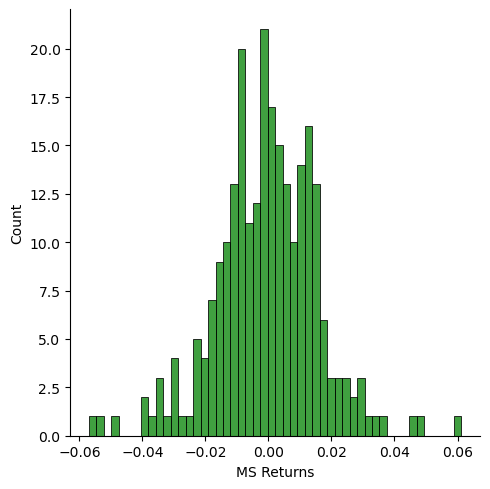

In [24]:
import seaborn as sns
sns.displot(returns.loc['2015-01-01': '2015-12-31']['MS Returns'], color = 'green', bins = 50)

** Distplot using seaborn of the 2008 returns for CitiGroup **

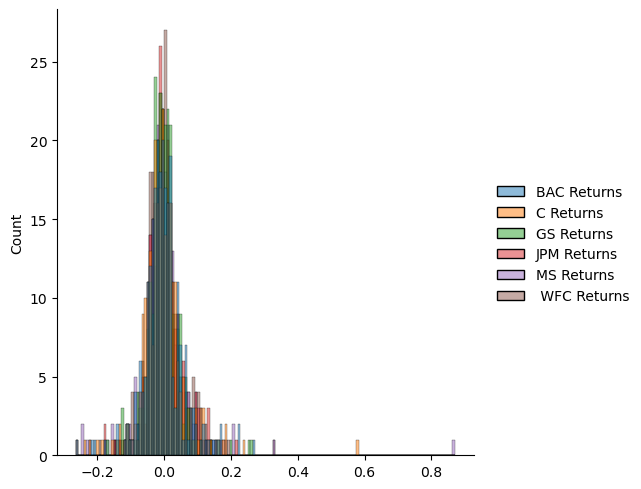

In [29]:
sns.displot(returns.loc['2008-01-01': '2008-12-31' ],bins = 150)
# sns.distplot(returns.loc['2008-01-01': '2008-12-31' ]['C Return'], color = 'red', bins = 150)
# financial crisis that the stock when through

____
# More Visualization

A lot of this project will focus on visualizations libraries: seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

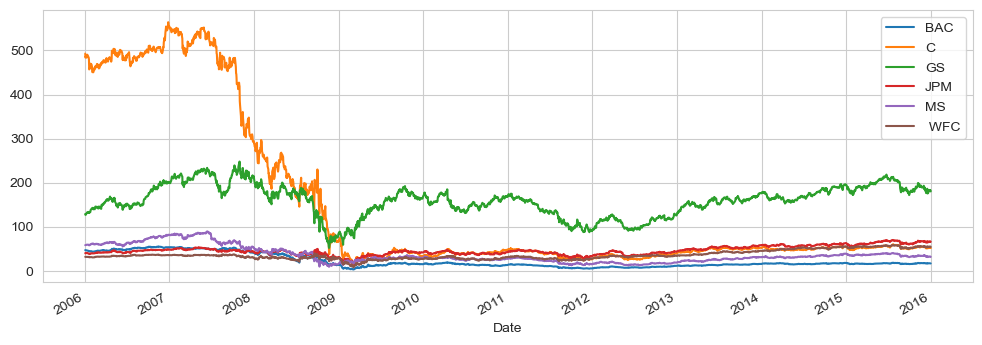

In [42]:
for ticks in tickers:
    bank_stocks[ticks]['Close'].plot(label = ticks, figsize=(12,4))
plt.legend()

In [25]:
# bank_stocks.xs('Close', axis=1, level='Stock Info').plot() 
# # bank_stocks.xs('Close', axis=1, level='Stock Info').iplot() # Cufflinks 
# play around

<AxesSubplot:xlabel='Date'>

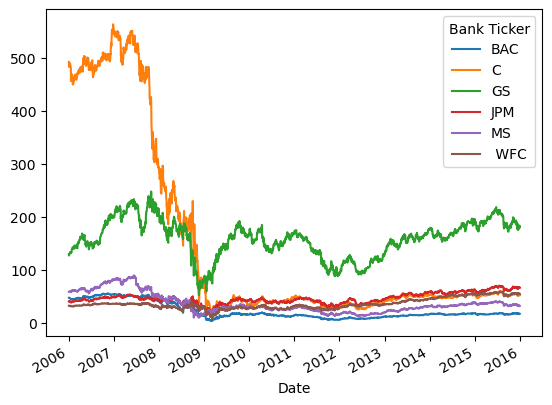

In [39]:
#xs(key, axis=0, level=None, drop_level=True)[source]# 
bank_stocks.xs(key = 'Close', level= 'Stock Info', axis = 1).plot()

## Moving Averages

analyzed the moving averages for these stocks in the year 2008. 

** the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<AxesSubplot:xlabel='Date'>

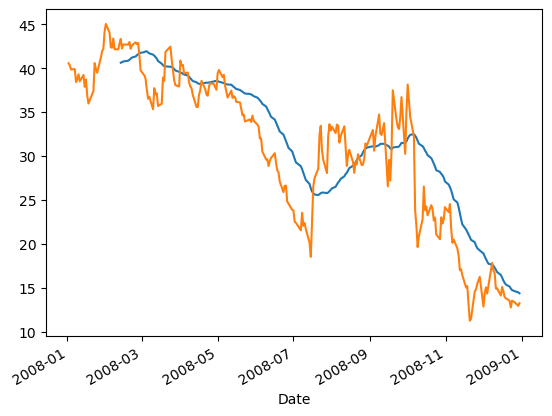

In [38]:
BACma = BAC.loc['2008-01-01': '2008-12-30']['Close'].rolling(30).mean()
BACma.plot()
BAC.loc['2008-01-01': '2008-12-30']['Close'].plot()

In [35]:
# plt.figure(figsize = (12,4))
# BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov')
# BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC Close')
# plt.legend()

** Heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

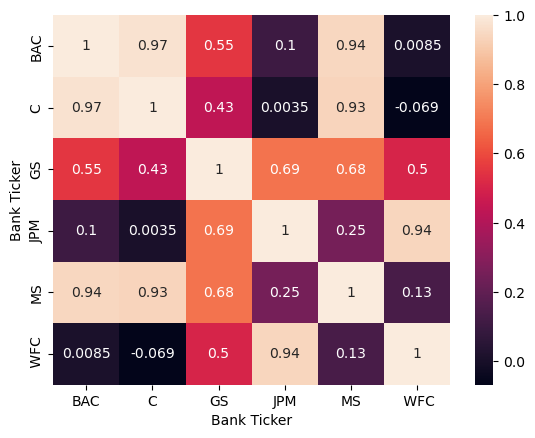

In [36]:
import seaborn as sns
corr = bank_stocks.xs(key= 'Close', level = 'Stock Info', axis = 1).corr()
# corr = bank_stocks['Close'].corr()
#bank_stocks.xs(key= 'Close', level = 'Stock Info'
corr
# bank_stocks.head()
sns.heatmap(corr, annot = True)

** Seaborn's clustermap to cluster the correlations together:**

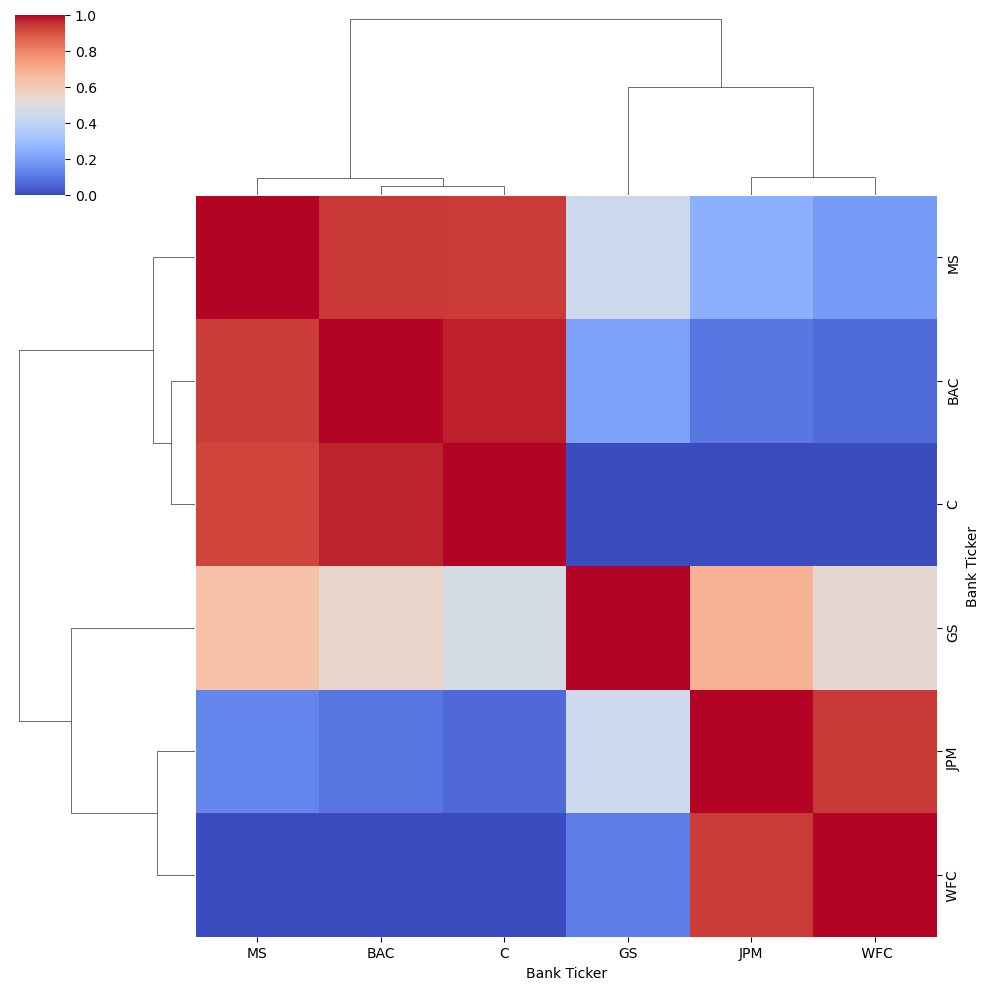

In [37]:
sns.clustermap(corr ,cmap='coolwarm',standard_scale=1)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [42]:
.iplot(kind='candle)

SyntaxError: invalid syntax (2816623395.py, line 1)

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.